In [1]:
import numpy as np 
import pandas as pd
from urllib import request
import matplotlib.pyplot as plt
import seaborn as sns 
from dateutil.parser import parse
from datetime import date
import calendar

# Data Handling 

<b>Loading the data</b><br>

Let's read our data in using pandas:

In [2]:
filepath = "./data/Code data_METRONOM.csv"
df = pd.read_csv(filepath, encoding = "ISO-8859-1", error_bad_lines=False, sep="\t")


/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,store_id,store_desc,CATMAN_BUY_DOMAIN_ID,CATMAN_BUY_DOMAIN_DESC,PCG_MAIN_CAT_ID,PCG_CAT_ID,PCG_CAT_DESC,PCG_SUB_CAT_ID,PCG_SUB_CAT_DESC,ART_NO,ART_NAME,Bv NNEK,Bv Stk,Bestand Ist NNEK,Bestand Ist Stück,WA Stück,Umsatz VK Netto,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738666,579,LIEFERDEPOT BERLIN,66,ACM BLUMEN,994,99,Sammelnummer,99,Sammelnummer,873756,PWHG 994 SANR.INV.RED.,NaN,NaN,0.0,0.0,NaN,NaN,27.01.20,27.01.20 Mon
738667,579,LIEFERDEPOT BERLIN,66,ACM BLUMEN,994,99,Sammelnummer,99,Sammelnummer,873756,PWHG 994 SANR.INV.RED.,NaN,NaN,0.0,0.0,NaN,NaN,28.01.20,28.01.20 Die
738668,579,LIEFERDEPOT BERLIN,66,ACM BLUMEN,994,99,Sammelnummer,99,Sammelnummer,873756,PWHG 994 SANR.INV.RED.,NaN,NaN,0.0,0.0,NaN,NaN,29.01.20,29.01.20 Mit
738669,579,LIEFERDEPOT BERLIN,66,ACM BLUMEN,994,99,Sammelnummer,99,Sammelnummer,873756,PWHG 994 SANR.INV.RED.,NaN,NaN,0.0,0.0,NaN,NaN,30.01.20,30.01.20 Don


When we look into the dataframe, we can see that there are 738671 rows and 19 columns in this data set.<br>
<br>
<br>
<b>Renaming the variables</b><br>
<br>
First we will rename the column names in prior to cleaning for easy understanding of the data.

In [4]:
df = df.rename(columns={"CATMAN_BUY_DOMAIN_ID": "purchasing_area_id",
                        "CATMAN_BUY_DOMAIN_DESC": "purchasing_area_description",
                        "PCG_MAIN_CAT_ID": "main_product_group_id",
                        "PCG_SUB_CAT_ID": "product_subgroup_category_id",
                        "PCG_SUB_CAT_DESC": "product_subgroup_category_description",
                        "PCG_CAT_ID": "product_group_category_id",
                        "PCG_CAT_DESC": "product_group_category_description",
                    "Bv NNEK" : "monthly_shrinkage_in_euros",
                   "Bv Stk" : "monthly_shrinkage_in_pieces",
                   "WA Stück" : "sales_in_pieces",
                   "Umsatz VK Netto" : "sales_in_euros",
                   "Bestand Ist NNEK" : "stocks_in_euros_per_day",
                   "Bestand Ist Stück" : "stocks_per_day"})

df.head()

,store_id,store_desc,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,DAY_DESC
0,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,01.01.20,01.01.20 Mit
1,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don
2,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,03.01.20,03.01.20 Fre
3,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,04.01.20,04.01.20 Sam
4,579,LIEFERDEPOT BERLIN,52,ACM MOLKEREIPRODUKTE,803,1,Posten Mopro,1,Posten Mopro,458903,"WG803 5l H-MILCH 3,5%",NaN,NaN,0.0,0.0,NaN,NaN,05.01.20,05.01.20 Son


Let's take a look at the columns in our data set.<br>

In [6]:
df.columns.tolist()

['store_id',
 'store_desc',
 'purchasing_area_id',
 'purchasing_area_description',
 'main_product_group_id',
 'product_group_category_id',
 'product_group_category_description',
 'product_subgroup_category_id',
 'product_subgroup_category_description',
 'ART_NO',
 'ART_NAME',
 'monthly_shrinkage_in_euros',
 'monthly_shrinkage_in_pieces',
 'stocks_in_euros_per_day',
 'stocks_per_day',
 'sales_in_pieces',
 'sales_in_euros',
 'date_of_day',
 'DAY_DESC']

<b>What each column means</b><br>

`store_id`: ID of the Depot where the data is from.<br>
`store_desc`: Store description of the Depot.<br>

There are categorical columns of the product categories in descending hierachy:<br>

`purchasing_area_id`,`purchasing_area_description`<br>
`main_product_group_id`<br>
`product_subgroup_category_id`,`product_subgroup_category_description`<br>

`ART_NO`: Article number.<br>
`ART_NAME`: Article name.<br>

`monthly_shrinkage_in_euros`: <br>
`monthly_shrinkage_in_pieces`:<br>
`stocks_in_euros_per_day`:<br>
`stocks_per_day`: <br>
`sales_in_pieces`: Sales in pieces per day. <br>
`sales_in_euros`: Sales in euros per day. <br>
`date_of_day`: Date. <br>
`DATE_DESC`: Date with name of the day.<br>

<b>Cleaning the data</b><br>
<br>
We won't need `store_id`, and `store_desc` for now, as all the data is from the same depot thus all identical, so will drop these columns.
For the product categories, description 


We are trying to predict the shrinkage of the products so the `monthly_shrinkage_in_euros` or `monthly_shrinkage_in_pieces` should be our label set. 


In [7]:
df.count()

store_id                                 738671
store_desc                               738671
purchasing_area_id                       738671
purchasing_area_description              738671
main_product_group_id                    738671
product_group_category_id                738671
product_group_category_description       738671
product_subgroup_category_id             738671
product_subgroup_category_description    738671
ART_NO                                   738671
ART_NAME                                 738671
monthly_shrinkage_in_euros                  597
monthly_shrinkage_in_pieces                 597
stocks_in_euros_per_day                  738671
stocks_per_day                           738671
sales_in_pieces                           14075
sales_in_euros                            14075
date_of_day                              738671
DAY_DESC                                 738671
dtype: int64

The code above counts non-NA cells for each column or row.<br>
Out of 738671 rows it indicates that there are only 597 rows that has non-NA cells for `monthly_shrinkage_in_euros` and `monthly_shrinkage_in_pieces`. We won't need the rows that doens't have this data so we will drop all the rows that misses shrinkage information.

In [8]:
df = df.dropna(subset=["monthly_shrinkage_in_euros", "monthly_shrinkage_in_pieces"])

In [9]:
df.count()

store_id                                 597
store_desc                               597
purchasing_area_id                       597
purchasing_area_description              597
main_product_group_id                    597
product_group_category_id                597
product_group_category_description       597
product_subgroup_category_id             597
product_subgroup_category_description    597
ART_NO                                   597
ART_NAME                                 597
monthly_shrinkage_in_euros               597
monthly_shrinkage_in_pieces              597
stocks_in_euros_per_day                  597
stocks_per_day                           597
sales_in_pieces                          266
sales_in_euros                           266
date_of_day                              597
DAY_DESC                                 597
dtype: int64

In [10]:
df.head()

,store_id,store_desc,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,DAY_DESC
9317,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,63.0,112.0,25.0,18.0,08.01.20,08.01.20 Mit
9329,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-33,486",-60.0,47.0,85.0,89.0,61.0,20.01.20,20.01.20 Mon
9331,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-0,5581",-1.0,78.0,140.0,69.0,45.0,22.01.20,22.01.20 Mit
9340,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,102.0,182.0,16.0,12.0,31.01.20,31.01.20 Fre
9342,579,LIEFERDEPOT BERLIN,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,"-8,3632",-16.0,25.0,48.0,5.0,4.0,02.01.20,02.01.20 Don


In [11]:
df = df.drop(['store_id','store_desc','DAY_DESC'], axis = 1)
df
#"Purchasing area id", "main product group id","art_no",...

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,63.0,112.0,25.0,18.0,08.01.20
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-33,486",-60.0,47.0,85.0,89.0,61.0,20.01.20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-0,5581",-1.0,78.0,140.0,69.0,45.0,22.01.20
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,"-1,1162",-2.0,102.0,182.0,16.0,12.0,31.01.20
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,"-8,3632",-16.0,25.0,48.0,5.0,4.0,02.01.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,"-7,3845",-3.0,25.0,10.0,NaN,NaN,29.01.20
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,"-107,1636",-12.0,0.0,0.0,NaN,NaN,21.01.20
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,"-237,9808",-31.0,31.0,4.0,4.0,36.0,07.01.20
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,"-25,333",-5.0,41.0,8.0,1.0,5.0,07.01.20


We can see that for "Monthly shrinkage in euros" they are using commas and other columns such as "Monthly shrinkage in pieces" are using periods. We will change the commas to period so we can work with them properly.

In [12]:
df["monthly_shrinkage_in_euros"].replace(',','.',inplace = True, regex = True)

In [13]:
df.head()

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,08.01.20
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.486,-60.0,47.0,85.0,89.0,61.0,20.01.20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,22.01.20
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,31.01.20
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,02.01.20


In [14]:
df.dtypes

purchasing_area_id                         int64
purchasing_area_description               object
main_product_group_id                      int64
product_group_category_id                  int64
product_group_category_description        object
product_subgroup_category_id               int64
product_subgroup_category_description     object
ART_NO                                     int64
ART_NAME                                  object
monthly_shrinkage_in_euros                object
monthly_shrinkage_in_pieces              float64
stocks_in_euros_per_day                  float64
stocks_per_day                           float64
sales_in_pieces                          float64
sales_in_euros                           float64
date_of_day                               object
dtype: object

Monthly Shrinkage in euros should be numerical value but it's stored as object types. We need to convert these into numeric types.

In [15]:
df[["monthly_shrinkage_in_euros"]] = df[["monthly_shrinkage_in_euros"]].apply(pd.to_numeric)

In [16]:
df.dtypes

purchasing_area_id                         int64
purchasing_area_description               object
main_product_group_id                      int64
product_group_category_id                  int64
product_group_category_description        object
product_subgroup_category_id               int64
product_subgroup_category_description     object
ART_NO                                     int64
ART_NAME                                  object
monthly_shrinkage_in_euros               float64
monthly_shrinkage_in_pieces              float64
stocks_in_euros_per_day                  float64
stocks_per_day                           float64
sales_in_pieces                          float64
sales_in_euros                           float64
date_of_day                               object
dtype: object

Let's check if there is positive shrinkage on column "Monthly_Shrinkage_in_Euros" which shouldn't be included in analysis as it's caused from errors during logistics. 

In [18]:
positive_shrinkage = df[df["monthly_shrinkage_in_euros"] > 0]
positive_shrinkage

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day


There are 8 items that shows positive shrinkage. We will only look at the rows that is 0 or smaller. 

In [19]:
df = df[df.monthly_shrinkage_in_euros <= 0]

It leaves us 589 rows.

In [20]:
df.count()

purchasing_area_id                       589
purchasing_area_description              589
main_product_group_id                    589
product_group_category_id                589
product_group_category_description       589
product_subgroup_category_id             589
product_subgroup_category_description    589
ART_NO                                   589
ART_NAME                                 589
monthly_shrinkage_in_euros               589
monthly_shrinkage_in_pieces              589
stocks_in_euros_per_day                  589
stocks_per_day                           589
sales_in_pieces                          263
sales_in_euros                           263
date_of_day                              589
dtype: int64

We will change the data type of "date_of_day" to date here.
First we need to change the format of the dates.

In [21]:
#duplicatedRows = df[df.duplicated(['ART_NAME'])]
#duplicatedRows

In [22]:
df["date_of_day"] = pd.to_datetime(df["date_of_day"], format = "%d.%m.%y")
df

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07


In [23]:
#store index of weekdays into "weekday_number"
df["weekday_number"] = df["date_of_day"].dt.dayofweek
df

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29,2
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21,1
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1


In [24]:
df["weekday"] = df["weekday_number"].apply(lambda x: calendar.day_name[x])
df

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,NaN,NaN,2020-01-29,2,Wednesday
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,NaN,NaN,2020-01-21,1,Tuesday
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1,Tuesday
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1,Tuesday


We will change the data type of weekday from object to category.

In [25]:
df['weekday'] = df['weekday'].astype('category')

Lastly, we will change the data type of all the categorical columns such as 'Purchasing_Area_ID', 'Purchasing_Area_Description', 'Main_Product_Group_ID', 'Product_Group_Category_ID', 'Product_Group_Category_Description', 'Product_Subgroup_Category_ID', 'Product_Subgroup_Category_Description', 'ART_NO', 'ART_NAME' from object to category.  


In [26]:
for col in ['purchasing_area_id', 'purchasing_area_description', 'main_product_group_id', 'product_group_category_id', 'product_group_category_description', 'product_subgroup_category_id', 'product_subgroup_category_description', 'ART_NO', 'ART_NAME']:
    df[col] = df[col].astype('category')
df.dtypes

purchasing_area_id                             category
purchasing_area_description                    category
main_product_group_id                          category
product_group_category_id                      category
product_group_category_description             category
product_subgroup_category_id                   category
product_subgroup_category_description          category
ART_NO                                         category
ART_NAME                                       category
monthly_shrinkage_in_euros                      float64
monthly_shrinkage_in_pieces                     float64
stocks_in_euros_per_day                         float64
stocks_per_day                                  float64
sales_in_pieces                                 float64
sales_in_euros                                  float64
date_of_day                              datetime64[ns]
weekday_number                                    int64
weekday                                        c

# Exploring the Data

In [27]:
df.groupby("purchasing_area_description")["monthly_shrinkage_in_euros"].sum()

purchasing_area_description
ACM BACKWAREN           -199.9313
ACM FEINKOST           -3371.1331
ACM FLEISCH            -2184.6305
ACM FRISCHFISCH        -1256.6433
ACM GEMUESE            -2400.3624
ACM KAESE              -3716.3172
ACM MOLKEREIPRODUKTE   -4353.7868
ACM OBST                -230.1300
ACM WURST              -5156.0581
Name: monthly_shrinkage_in_euros, dtype: float64

In [28]:
df.groupby("purchasing_area_description").sum()

,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,weekday_number
purchasing_area_description,,,,,,,
ACM BACKWAREN,-199.9313,-208.0,1253.000,1125.000,328.00,295.0,61
ACM FEINKOST,-3371.1331,-753.0,3518.000,968.000,120.00,504.0,202
ACM FLEISCH,-2184.6305,-9.0,6491.027,12.000,0.00,2934.0,144
ACM FRISCHFISCH,-1256.6433,-211.0,483.000,92.000,86.00,333.0,41
ACM GEMUESE,-2400.3624,-855.0,4347.361,2060.000,888.00,3366.0,106
ACM KAESE,-3716.3172,-1238.0,7250.993,3522.440,298.00,1052.0,211
ACM MOLKEREIPRODUKTE,-4353.7868,-4639.0,14516.214,7548.439,3508.44,5138.0,334
ACM OBST,-230.1300,-87.0,291.000,89.000,123.00,364.0,11
ACM WURST,-5156.0581,-1020.0,7481.000,1869.000,135.00,1046.0,412


Let's see which articles have no value on "Sales in Pieces" or "Sales in Euros". Note that from above table for "ACM_Fleisch", "Sales_in_Pieces" is 0 but "Sales_in_Euros" is not so it means that different rows could have NaN for each "Sales in Pieces" or "Sales_in_Euros" (need to be edited)

In [29]:
temp = df[df['sales_in_pieces'].isnull()]
temp[temp['sales_in_euros'].notnull()]

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday


Let's check if there's any rows that has negative values in "Sales_in_Pieces" or "Sales_in_Euros".

In [30]:
df[df['sales_in_pieces'] < 0 ]

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
565790,67,ACM GEMUESE,983,1,Salatmischungen,1,Blattsalatmischungen,128761,1kg SALATMISCHUNG EXQUISIT,-36.7664,-8.0,9.0,2.0,-4.0,-23.0,2020-01-07,1,Tuesday


In [31]:
df[df['sales_in_euros'] < 0]

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
565790,67,ACM GEMUESE,983,1,Salatmischungen,1,Blattsalatmischungen,128761,1kg SALATMISCHUNG EXQUISIT,-36.7664,-8.0,9.0,2.0,-4.0,-23.0,2020-01-07,1,Tuesday


In [32]:
df[df['stocks_in_euros_per_day'] < 0]

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
101061,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,704024,125g ARO FORELLENFILETS(2),-43.4341,-31.0,-24.0,-17.0,20.0,34.0,2020-01-07,1,Tuesday
140092,52,ACM MOLKEREIPRODUKTE,930,20,Milch frisch,2,"Bis 3,5 % Fett",65949,"1l Arla Bio Weidemilch 3,8%",-154.5984,-122.0,-25.0,-20.0,40.0,52.0,2020-01-09,3,Thursday
155100,52,ACM MOLKEREIPRODUKTE,931,30,Joghurt,22,Frucht bis 5 %,433305,"20X100g FRUJOG. 3,5% E/H/HE/K",-105.7420,-20.0,-275.0,-52.0,NaN,NaN,2020-01-17,4,Friday
155462,52,ACM MOLKEREIPRODUKTE,931,30,Joghurt,22,Frucht bis 5 %,604249,"200g MB Fruchtjoghurt 3,5%",-22.0880,-80.0,-20.0,-95.0,20.0,8.0,2020-01-07,1,Tuesday
155464,52,ACM MOLKEREIPRODUKTE,931,30,Joghurt,22,Frucht bis 5 %,604249,"200g MB Fruchtjoghurt 3,5%",-19.6520,-40.0,-46.0,-155.0,80.0,33.0,2020-01-09,3,Thursday
179066,52,ACM MOLKEREIPRODUKTE,937,20,Lactosefreie Produkte,4,Getraenke,141082,"1l H-MILCH 1,5% MINUS L",-21.0688,-16.0,-105.0,-80.0,512.0,511.0,2020-01-08,2,Wednesday
218538,53,ACM FEINKOST,945,40,Snacks/Pizza/Aufbackware,30,Teigwaren,97703,1l EIFIX FRISCHER WAFFELTEIG,-34.6024,-8.0,-78.0,-18.0,27.0,161.0,2020-01-17,4,Friday
238337,53,ACM FEINKOST,945,60,Feinkostsalate,4,Krautsalat,607047,400g GRIECHISCHER KRAUTSALAT,-14.5179,-9.0,-5.0,-3.0,7.0,13.0,2020-01-07,1,Tuesday
242872,53,ACM FEINKOST,945,63,"Cremes, Dips, Aufstriche",3,Aufstriche,303314,1kg GUACAMOLE,-42.9522,-3.0,-14.0,-1.0,1.0,12.0,2020-01-16,3,Thursday
253907,64,ACM WURST,959,1,Bruehwurst/Aufschnitt,10,Lyoner/Mortadella,10078,500g HS MIX3 SCHINKENW./JAGDW.,-38.8058,-11.0,-4.0,-1.0,1.0,5.0,2020-01-23,3,Thursday


Let's check 'ACM FLEISCH' seperately.

In [33]:
fleisch = df[df['purchasing_area_description'] == "ACM FLEISCH"]
fleisch.sort_values(by=["sales_in_pieces"])

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
306717,63,ACM FLEISCH,970,1,Schweinefleisch frisch,65,SW Nacken ohne Knochen,637033,QS SW-NACKEN O.KN. VAC.PAZ,-10.3571,0.0,-10.000,0.0,0.0,103.0,2020-01-02,3,Thursday
349473,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-18.6381,0.0,0.000,0.0,0.0,70.0,2020-01-24,4,Friday
349459,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-7.8975,0.0,-46.000,0.0,0.0,88.0,2020-01-10,4,Friday
349456,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-9.7227,0.0,18.000,0.0,0.0,13.0,2020-01-07,1,Tuesday
349451,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,714649,"QS HAEHN.-UNTERSCH. CA.2,5kg",-18.3573,0.0,9.000,0.0,0.0,42.0,2020-01-02,3,Thursday
349342,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,704558,QS HAEHN.-SCHENKEL25%Rück. 3kg,-5.4289,0.0,-2.000,0.0,0.0,16.0,2020-01-17,4,Friday
348950,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,621023,QS FLEISCH-HAHN >1500g,-17.2344,0.0,30.000,0.0,0.0,30.0,2020-01-28,1,Tuesday
348805,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,392499,"QS HAE.OBERKEULE O.H.O.K.2,5kg",-11.3960,0.0,364.000,0.0,0.0,14.0,2020-01-07,1,Tuesday
348801,63,ACM FLEISCH,970,70,Gefluegel frisch,5,Haehnchen,392499,"QS HAE.OBERKEULE O.H.O.K.2,5kg",-10.8680,0.0,442.000,0.0,0.0,277.0,2020-01-03,4,Friday
344682,63,ACM FLEISCH,970,30,Kalbfleisch frisch,20,KA Sonstiges,454301,KA-MASKE IM NETZ GEBRUEHT,-93.8400,0.0,-6.000,0.0,0.0,135.0,2020-01-07,1,Tuesday


The table above indicates all the data related to pieces in Fleisch category are missing. 

In [34]:
back = df[df['purchasing_area_description'] == "ACM BACKWAREN"]
#back[back["Stocks_per_Day"] < 0 ]
back

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday
9349,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-14.6356,-28.0,3.0,6.0,19.0,17.0,2020-01-09,3,Thursday
9559,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,53912,750g GAB SUPER SANDWICH,-8.3941,-11.0,69.0,91.0,32.0,27.0,2020-01-02,3,Thursday
9807,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,452669,750g GAB VOLLKORN SANDWICH,-11.4465,-15.0,48.0,63.0,22.0,20.0,2020-01-02,3,Thursday
9922,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,668258,750g SAMMY'S POW SANDWICH VOLL,-4.7370,-3.0,0.0,0.0,NaN,NaN,2020-01-24,4,Friday
10024,61,ACM BACKWAREN,872,3,Toastbrot,4,Sandwichtoast,936163,750g SAMMYS SUPER SANDWICH,-3.1580,-2.0,57.0,36.0,NaN,NaN,2020-01-02,3,Thursday


In [35]:
df[df['purchasing_area_description'] == "ACM FRISCHFISCH"]

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
99014,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,146011,500g ARO RAEUCHERLACHS (2),-71.8758,-9.0,0.0,0.0,1.0,9.0,2020-01-06,0,Monday
99024,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,146011,500g ARO RAEUCHERLACHS (2),-251.2140,-30.0,117.0,14.0,6.0,57.0,2020-01-16,3,Thursday
99025,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,146011,500g ARO RAEUCHERLACHS (2),-108.8594,-13.0,0.0,0.0,1.0,9.0,2020-01-17,4,Friday
100344,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,704005,200g ARO RAEUCHERLACHS (2),-207.3360,-60.0,245.0,71.0,58.0,224.0,2020-01-03,4,Friday
100535,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,817766,150g ARO Graved Lachs (2),-28.1840,-10.0,28.0,10.0,NaN,NaN,2020-01-08,2,Wednesday
100537,51,ACM FRISCHFISCH,922,10,Raeucherfisch,1,Lachs,817766,150g ARO Graved Lachs (2),-11.2736,-4.0,14.0,5.0,NaN,NaN,2020-01-10,4,Friday
100998,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,262274,750g MC FORELLENFILET,-26.3427,-3.0,0.0,0.0,NaN,NaN,2020-01-06,0,Monday
101016,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,262274,750g MC FORELLENFILET,-35.1236,-4.0,0.0,0.0,NaN,NaN,2020-01-24,4,Friday
101061,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,704024,125g ARO FORELLENFILETS(2),-43.4341,-31.0,-24.0,-17.0,20.0,34.0,2020-01-07,1,Tuesday
101133,51,ACM FRISCHFISCH,922,10,Raeucherfisch,2,Forellen,906362,500g FORELLENFILET WECHSLER,-62.6470,-5.0,0.0,0.0,NaN,NaN,2020-01-17,4,Friday


In [36]:
df['sales_in_euros'] = df['sales_in_euros'].fillna(0)
df['sales_in_pieces'] = df['sales_in_pieces'].fillna(0)
df

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,0.0,0.0,2020-01-29,2,Wednesday
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,0.0,0.0,2020-01-21,1,Tuesday
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1,Tuesday
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1,Tuesday


In [37]:
df.isnull().values.any()

False

<b>Adding new feature</b><br>



In [50]:
df['freshness'] = 'fresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FLEISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FRISCHFISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM GEMUESE'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM BLUMEN'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM OBST'] = 'ultrafresh'

df

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,ART_NO,ART_NAME,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,date_of_day,weekday_number,weekday,freshness
9317,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,63.0,112.0,25.0,18.0,2020-01-08,2,Wednesday,fresh
9329,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-33.4860,-60.0,47.0,85.0,89.0,61.0,2020-01-20,0,Monday,fresh
9331,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-0.5581,-1.0,78.0,140.0,69.0,45.0,2020-01-22,2,Wednesday,fresh
9340,61,ACM BACKWAREN,872,3,Toastbrot,2,Buttertoast,458173,500g GAB BUTTERTOAST,-1.1162,-2.0,102.0,182.0,16.0,12.0,2020-01-31,4,Friday,fresh
9342,61,ACM BACKWAREN,872,3,Toastbrot,3,Vollkorntoast,53487,500g GAB DREIKORNTOAST,-8.3632,-16.0,25.0,48.0,5.0,4.0,2020-01-02,3,Thursday,fresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584288,67,ACM GEMUESE,983,8,Frische Dressings,1,Frische Dressings,586725,CAESAR´S DRESSING 1kg,-7.3845,-3.0,25.0,10.0,0.0,0.0,2020-01-29,2,Wednesday,ultrafresh
586636,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,140473,POMMES FRITES 10 mm 10kg FARM,-107.1636,-12.0,0.0,0.0,0.0,0.0,2020-01-21,1,Tuesday,ultrafresh
586808,67,ACM GEMUESE,983,10,Kartoffel-Convenience,10,Pommes frites,227174,MC POMMES 8mm 2x5kg,-237.9808,-31.0,31.0,4.0,4.0,36.0,2020-01-07,1,Tuesday,ultrafresh
587366,67,ACM GEMUESE,983,10,Kartoffel-Convenience,15,Kartoffel-Convenience,37346,MC KARTOFFELSCHEIBEN 3kg,-25.3330,-5.0,41.0,8.0,1.0,5.0,2020-01-07,1,Tuesday,ultrafresh


In [52]:
df.groupby("freshness").sum()

,monthly_shrinkage_in_euros,monthly_shrinkage_in_pieces,stocks_in_euros_per_day,stocks_per_day,sales_in_pieces,sales_in_euros,weekday_number
freshness,,,,,,,
fresh,-16797.2265,-7858.0,34019.207,15032.879,4389.44,8035.0,1220
ultrafresh,-6071.7662,-1162.0,11612.388,2253.000,1097.00,6997.0,302


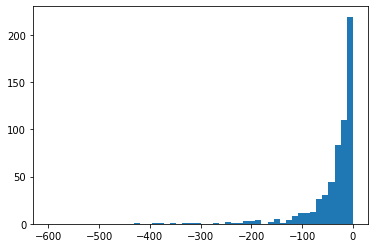

In [60]:
fix, ax = plt.subplots()
ax.hist(df["monthly_shrinkage_in_euros"], bins=50, range=(-600, 0))

plt.show()

#Count how many rows each day of week has. (Return the frequency of each unique value in "weekday" column)

In [38]:
df.groupby("weekday").size()

weekday
Friday       252
Monday        83
Sunday         1
Thursday      89
Tuesday       87
Wednesday     77
dtype: int64

In [39]:
df.groupby("weekday")["monthly_shrinkage_in_euros"].sum()

weekday
Friday      -9617.0413
Monday      -2863.1071
Sunday         -1.2144
Thursday    -3477.4796
Tuesday     -4091.1159
Wednesday   -2819.0344
Name: monthly_shrinkage_in_euros, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

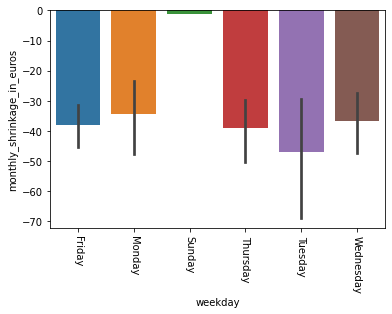

In [64]:
sns.barplot(data = df, x = "weekday", y = "monthly_shrinkage_in_euros")
plt.xticks(rotation=-90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

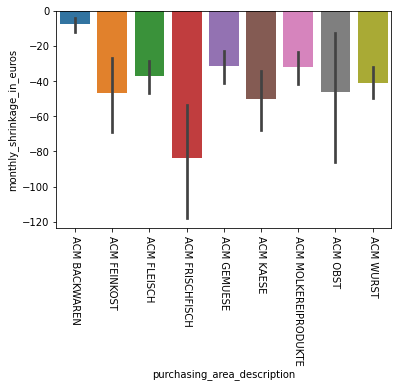

In [63]:
sns.barplot(data = df, x = "purchasing_area_description", y = "monthly_shrinkage_in_euros")
plt.xticks(rotation=-90)

/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/user/Documents/venv/py3venv/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


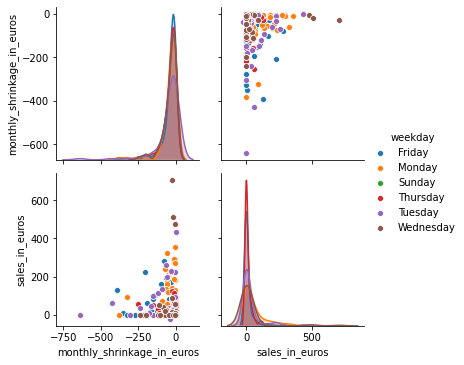

In [69]:
g = sns.pairplot(df, hue = "freshness",
                 vars = ["monthly_shrinkage_in_euros" , "sales_in_euros"])

In [70]:
df["monthly_shrinkage_in_euros"].describe()

count    589.000000
mean     -38.826813
std       60.421273
min     -638.820000
25%      -43.462500
50%      -19.350000
75%       -8.400000
max       -0.557000
Name: monthly_shrinkage_in_euros, dtype: float64

In [73]:
df.groupby("purchasing_area_description")["monthly_shrinkage_in_euros"].mean()

purchasing_area_description
ACM BACKWAREN           -7.689665
ACM FEINKOST           -46.821293
ACM FLEISCH            -37.027636
ACM FRISCHFISCH        -83.776220
ACM GEMUESE            -31.173538
ACM KAESE              -50.220503
ACM MOLKEREIPRODUKTE   -32.250273
ACM OBST               -46.026000
ACM WURST              -40.921096
Name: monthly_shrinkage_in_euros, dtype: float64

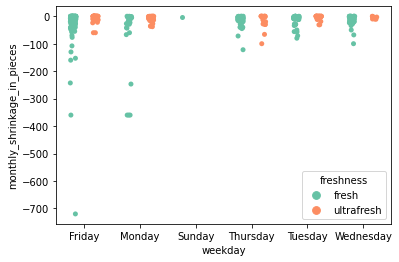

In [76]:
sns.stripplot(x="weekday", y="monthly_shrinkage_in_pieces", hue="freshness", data = df,
             palette="Set2", dodge=True)

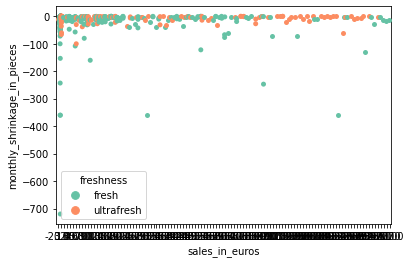

In [79]:
sns.stripplot(x="sales_in_euros", y="monthly_shrinkage_in_pieces", hue="freshness", data = df,
             palette="Set2", dodge=True)

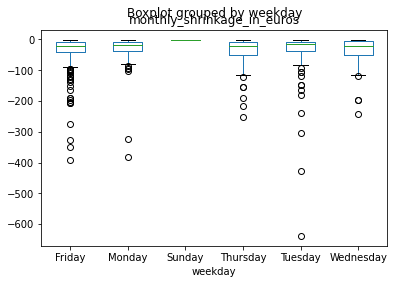

In [86]:
df.boxplot(by ='weekday', column =['monthly_shrinkage_in_euros'], grid = False)

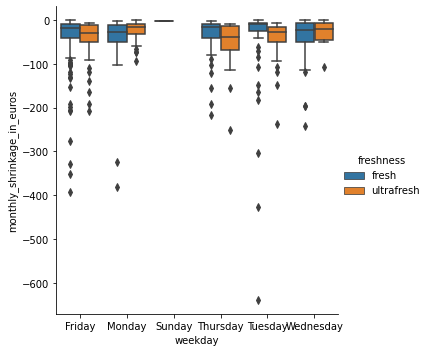

In [88]:
sns.catplot(x="weekday",y="monthly_shrinkage_in_euros", hue="freshness", kind="box", data=df)

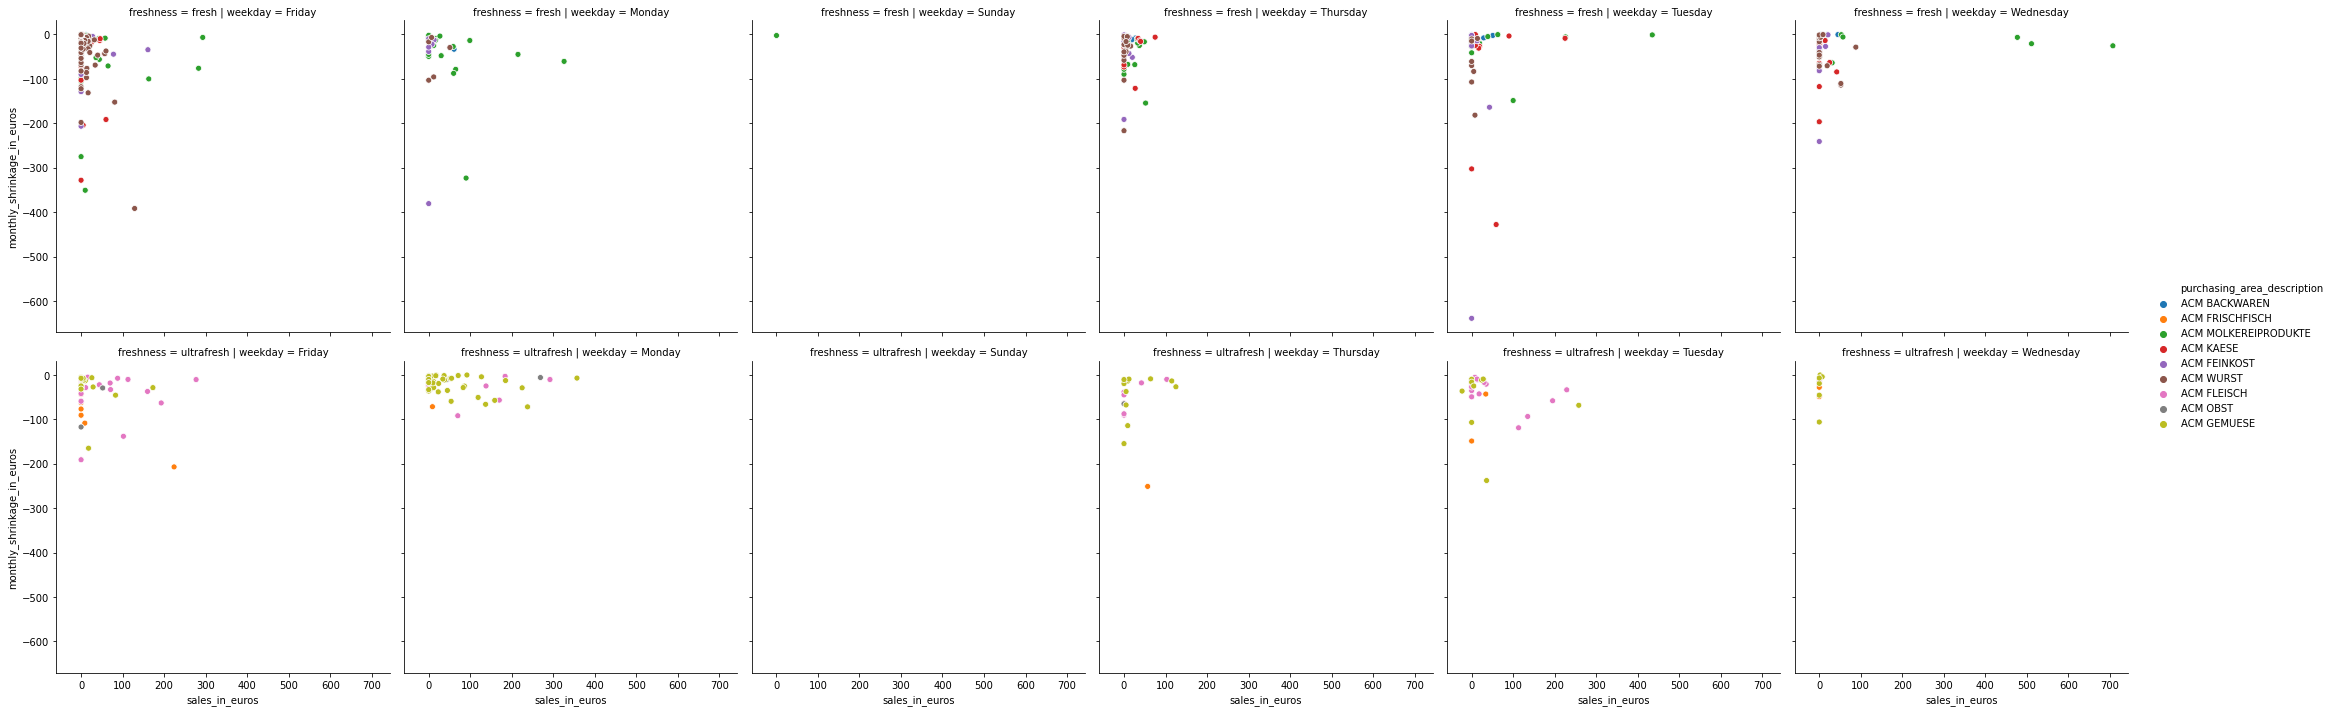

In [95]:
sns.relplot(x="sales_in_euros", y="monthly_shrinkage_in_euros", hue="purchasing_area_description", row="freshness",col="weekday", data=df)

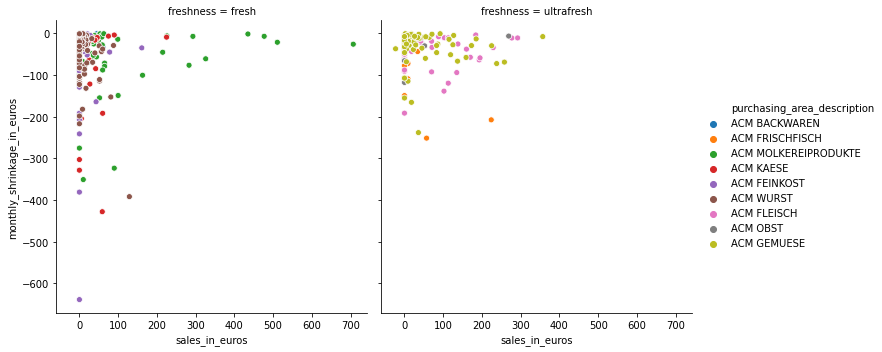

In [96]:
sns.relplot(x="sales_in_euros",y="monthly_shrinkage_in_euros",hue="purchasing_area_description",col="freshness",data=df)

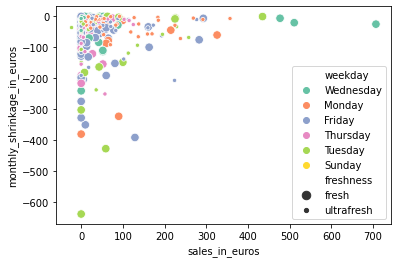

In [100]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="sales_in_euros", y="monthly_shrinkage_in_euros",
                     hue="weekday", size="freshness",
                     palette="Set2",
                     data=df)

In [41]:
df.groupby("purchasing_area_description")["monthly_shrinkage_in_pieces"].mean()

purchasing_area_description
ACM BACKWAREN           -8.000000
ACM FEINKOST           -10.458333
ACM FLEISCH             -0.152542
ACM FRISCHFISCH        -14.066667
ACM GEMUESE            -11.103896
ACM KAESE              -16.729730
ACM MOLKEREIPRODUKTE   -34.362963
ACM OBST               -17.400000
ACM WURST               -8.095238
Name: monthly_shrinkage_in_pieces, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

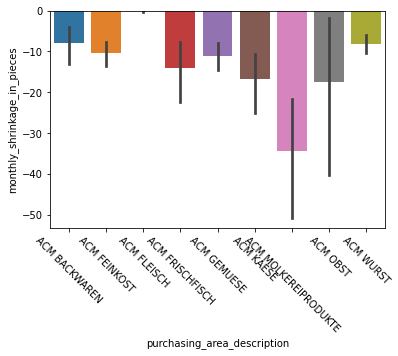

In [42]:
sns.barplot(data = df, x = "purchasing_area_description", y = "monthly_shrinkage_in_pieces")
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

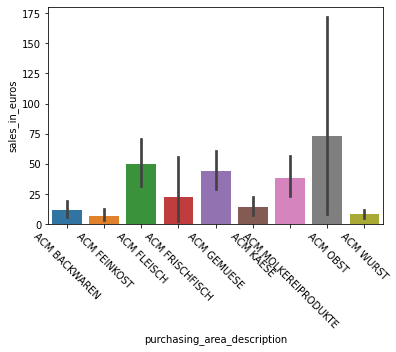

In [43]:
sns.barplot(data = df, x = "purchasing_area_description", y = "sales_in_euros")
plt.xticks(rotation=-45)

In [44]:
sorted([(col, df[col].unique().size) for col in df.columns.values], key=lambda tup: tup[1], reverse=True)

[('monthly_shrinkage_in_euros', 564),
 ('ART_NO', 408),
 ('ART_NAME', 406),
 ('stocks_in_euros_per_day', 231),
 ('product_subgroup_category_description', 189),
 ('stocks_per_day', 137),
 ('sales_in_euros', 112),
 ('product_group_category_description', 77),
 ('monthly_shrinkage_in_pieces', 66),
 ('sales_in_pieces', 56),
 ('product_subgroup_category_id', 40),
 ('product_group_category_id', 28),
 ('main_product_group_id', 24),
 ('date_of_day', 22),
 ('purchasing_area_id', 9),
 ('purchasing_area_description', 9),
 ('weekday_number', 6),
 ('weekday', 6)]